In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
df=pd.read_csv("UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df=df.drop(['ID'],axis=1)

In [6]:
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)

In [7]:
#Cleaning undocumented labels
#The labels 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (4)
df["EDUCATION"]=df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
#The lebel 0 in MARRIAGE can be safely categorized as 'Other' (3)
df["MARRIAGE"]=df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [8]:
#"-1" is paid duly, but there are "-2" and "0" labels in payment status variable. 
#So let's combine them and put everything as "0"

val = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[val, 'PAY_1'] = 0
val = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[val, 'PAY_2'] = 0
val = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[val, 'PAY_3'] = 0
val = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[val, 'PAY_4'] = 0
val = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[val, 'PAY_5'] = 0
val = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[val, 'PAY_6'] = 0

### EDA

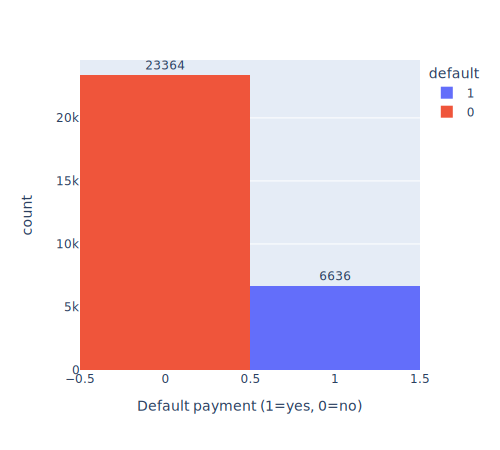

In [34]:
fig=px.histogram(df, x='default', color="default", barmode='stack',text_auto='5.0s')
fig.update_layout(width=500,height=450,xaxis_title="Default payment (1=yes, 0=no)")
fig.update_traces(textposition="outside")
fig.show("svg")

Fig shows there is 6636 people who may default payment next month

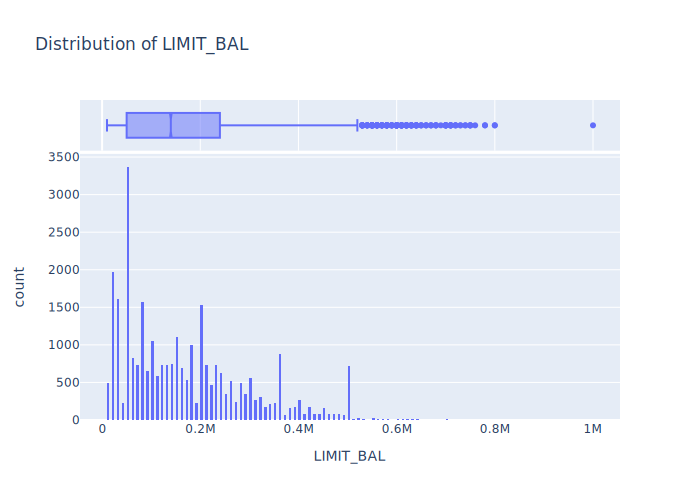

In [35]:
fig= px.histogram(df, x = 'LIMIT_BAL', marginal = 'box',
                  title = 'Distribution of LIMIT_BAL')             
fig.show("svg")

Distribution of limit on credit card is plotted.

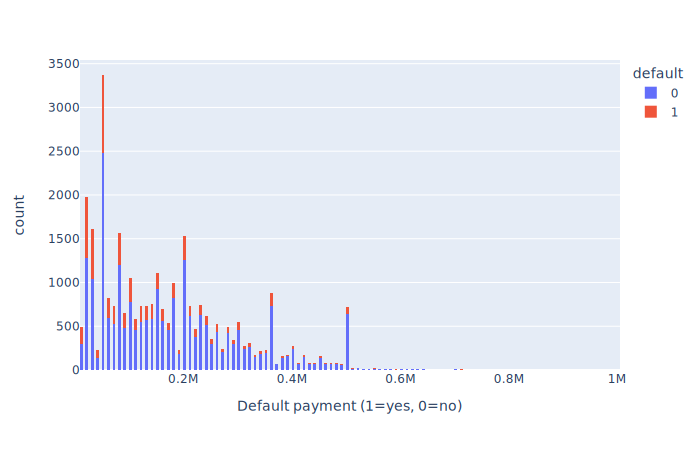

In [36]:
limit=df.pivot(columns='default', values='LIMIT_BAL')
fig=px.histogram(limit,color="default",barmode='stack')
fig.update_layout(width=700,height=450,xaxis_title="Default payment (1=yes, 0=no)")
fig.show("svg")

There is no specific trend or relationship between CC limit and default in payment

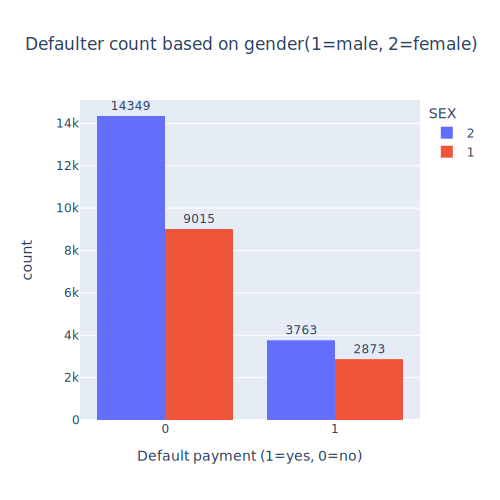

In [43]:
fig=px.histogram(df, x='default', color="SEX",
                 barmode='group',text_auto='5.0s',title="Defaulter count based on gender(1=male, 2=female)")
fig.update_layout(width=500,height=500,xaxis_title="Default payment (1=yes, 0=no)")
fig.update_traces(textposition="outside")
fig.show("svg")

Males seem to have  more default paymment when compared to female CC holders.

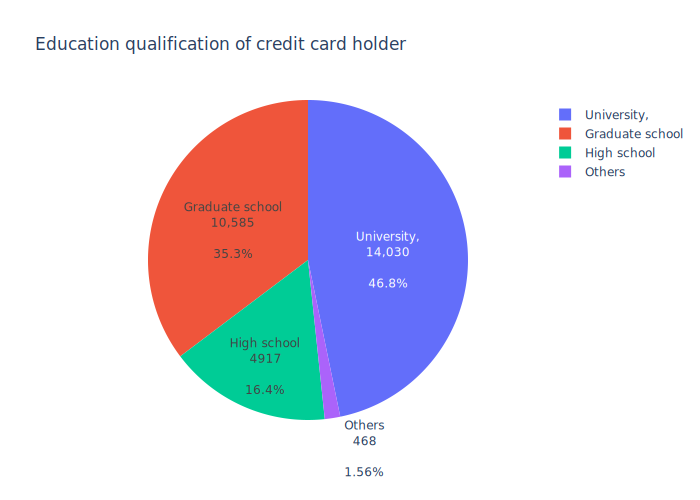

In [38]:
education=df.groupby(['EDUCATION']).size().reset_index(name='count')
education.EDUCATION=education.EDUCATION.map({1:'Graduate school',2:'University,',3:'High school',
                                             4:'Others'})
fig= px.pie(education, values='count', names = 'EDUCATION',
            title = 'Education qualification of credit card holder')
fig.update_traces(textposition='auto', textinfo='percent+label+value')
fig.show("svg")

Fig describe the ducational qualification of the CC holders. 46.8 % are university qualified, 35.3% have passed graduate school and 16.4% are highschool completed.

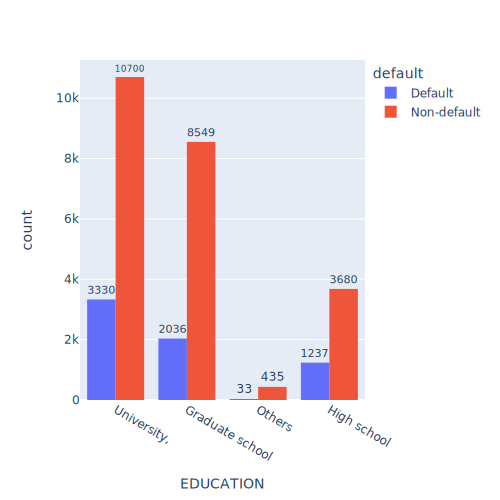

In [39]:
education1=df[['EDUCATION','default']]
education1.EDUCATION=education1.EDUCATION.map({1:'Graduate school',2:'University,',3:'High school',
                                             4:'Others'})
education1.default=education1.default.map({0: 'Non-default', 1: 'Default'})
fig=px.histogram(education1, x='EDUCATION', color="default", barmode='group',text_auto='5.0s')
fig.update_layout(width=500,height=500)
fig.update_traces(textposition="outside")
fig.show("svg")

University qualified have highest default rate. There is no specific trend oberved.

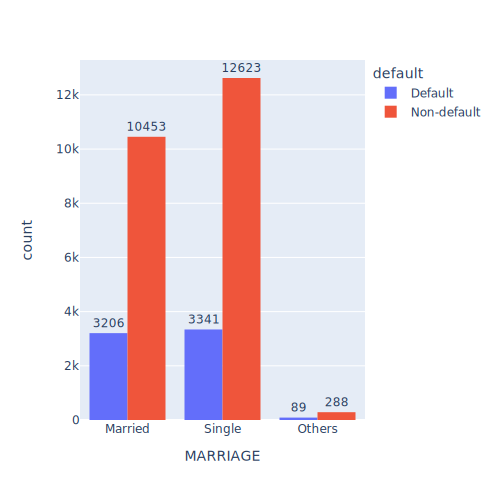

In [40]:
marriage=df[['MARRIAGE','default']]
marriage.MARRIAGE=marriage.MARRIAGE.map({1:'Married',2:'Single',3:'Others'})
marriage.default=marriage.default.map({0: 'Non-default', 1: 'Default'})
fig=px.histogram(marriage, x='MARRIAGE', color="default", barmode='group',text_auto='5.0s')
fig.update_layout(width=500,height=500)
fig.update_traces(textposition="outside")
fig.show("svg")

Marital status doesnt impact payment status

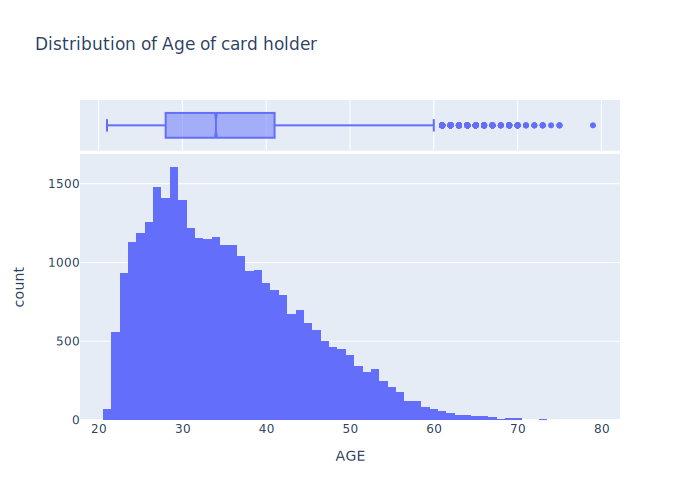

In [41]:
fig=px.histogram(df, x = 'AGE',title = 'Distribution of Age of card holder',nbins = 75, marginal = 'box')
fig.update_layout(width=700,height=500)
fig.show("svg")

Card holders seem to max between the age of 28 an 41 which is working population.

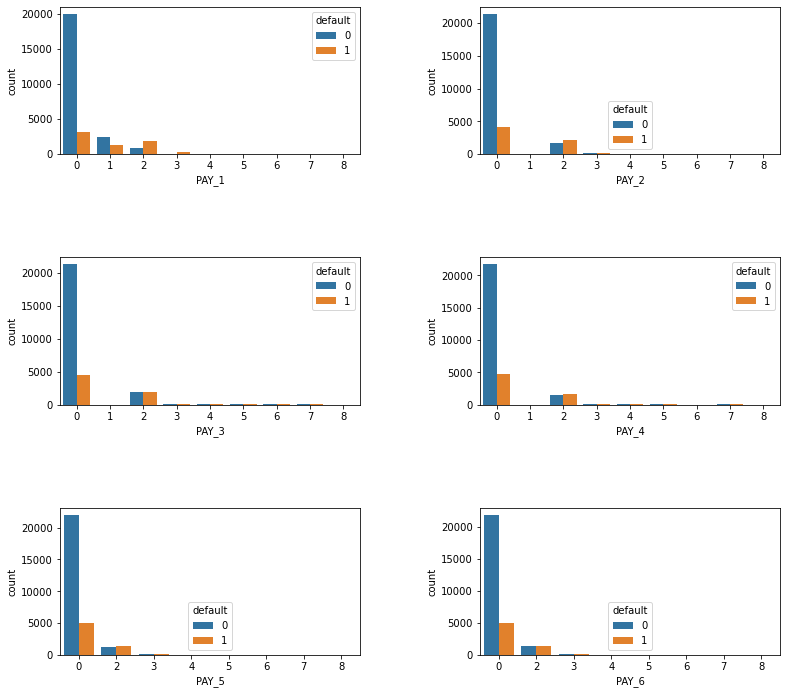

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.countplot(x="PAY_1", data=df,hue='default')

plt.subplot(3,2,2)
sns.countplot(x="PAY_2", data=df,hue='default')

plt.subplot(3,2,3)
sns.countplot(x="PAY_3", data=df,hue='default')

plt.subplot(3,2,4)
sns.countplot(x="PAY_4", data=df,hue='default')

plt.subplot(3,2,5)
sns.countplot(x="PAY_5", data=df,hue='default')

plt.subplot(3,2,6)
sns.countplot(x="PAY_6", data=df,hue='default')

plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=1.5, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.7)
plt.show()

the figure shows the repayment status and default respectively. No particular trend can be observed

### Splitting the data

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(['default'], axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30)

### Scaling the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random resampling for imbalanced classification

In [20]:
df_train = X_train.join(y_train)
df_majority = df_train[df_train.default == 0]
df_minority = df_train[df_train.default == 1]

print(df_train.default.value_counts())

0    18646
1     5354
Name: default, dtype: int64


####  Random Oversampling: Randomly duplicate examples in the minority class

In [21]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample 

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,         # sample with replacement
                                 n_samples = 18646,    # to match majority class
                                 random_state= 30)     # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.default.value_counts()

0    18646
1    18646
Name: default, dtype: int64

####  Random Undersampling: Randomly delete examples in the majority class.

In [22]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,      # sample without replacement
                                 n_samples=5354,     # to match minority class
                                 random_state=30)    # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.default.value_counts()

0    5354
1    5354
Name: default, dtype: int64

#### SMOTE: Synthetic Minority Oversampling Technique

In [23]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=30)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

37292
18646


### Logistic regresion 

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score,accuracy_score

xtrain_data = [X_train,df_upsampled.drop('default',axis = 1),df_downsampled.drop('default',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default'],df_downsampled['default'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print(k)
    logistic_reg = LogisticRegression()
    logistic_reg.fit(i, j)
    y_pred_logistic_reg = logistic_reg.predict(X_test_scaled)
    cv_logistic_reg= cross_val_score(logistic_reg,i,j,cv=10).mean()
    print('Confusion matrix:\n',confusion_matrix( y_test, y_pred_logistic_reg ))
    print('Accuracy:', accuracy_score(y_test,y_pred_logistic_reg))
    print('AUROC score:',roc_auc_score(y_test, logistic_reg.predict_proba(X_test_scaled)[:,1]))
    print('F1 score:',f1_score(y_test, y_pred_logistic_reg))
    print("Cross_validation score:",cv_logistic_reg)
    print("----------------------------------------",'\n')

Normal Sampling
Confusion matrix:
 [[2124 2594]
 [ 529  753]]
Accuracy: 0.4795
AUROC score: 0.5484002085814674
F1 score: 0.32534024627349317
Cross_validation score: 0.7767916666666667
---------------------------------------- 

Over Sampling
Confusion matrix:
 [[2734 1984]
 [ 578  704]]
Accuracy: 0.573
AUROC score: 0.5954623114979707
F1 score: 0.35465994962216624
Cross_validation score: 0.6160572773213643
---------------------------------------- 

Under Sampling
Confusion matrix:
 [[2744 1974]
 [ 589  693]]
Accuracy: 0.5728333333333333
AUROC score: 0.5907927054682865
F1 score: 0.350974930362117
Cross_validation score: 0.6198165746049199
---------------------------------------- 

SMOTE
Confusion matrix:
 [[2726 1992]
 [ 601  681]]
Accuracy: 0.5678333333333333
AUROC score: 0.5803254406564562
F1 score: 0.34437420986093553
Cross_validation score: 0.6076913863300255
---------------------------------------- 



In [26]:
logistic_reg.predict_proba(X_test_scaled)

array([[0.4999687 , 0.5000313 ],
       [0.49983037, 0.50016963],
       [0.50018335, 0.49981665],
       ...,
       [0.50013994, 0.49986006],
       [0.49993231, 0.50006769],
       [0.50002672, 0.49997328]])

### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print(k)
    dtc = DecisionTreeClassifier()
    dtc.fit(i, j)
    y_pred_dtc = dtc.predict(X_test_scaled)
    cv_dtc= cross_val_score(dtc,i,j,cv=10).mean()
    print('Confusion matrix:\n',confusion_matrix( y_test, y_pred_dtc ))
    print('Accuracy:', accuracy_score(y_test,y_pred_dtc))
    print('AUROC score:',roc_auc_score(y_test, dtc.predict_proba(X_test_scaled)[:,1]))
    print('F1 score:',f1_score(y_test, y_pred_dtc))
    print("Cross_validation score:",cv_dtc)
    print("----------------------------------------",'\n')

Normal Sampling
Confusion matrix:
 [[4326  392]
 [ 752  530]]
Accuracy: 0.8093333333333333
AUROC score: 0.6651652416245017
F1 score: 0.4809437386569873
Cross_validation score: 0.7239166666666667
---------------------------------------- 

Over Sampling
Confusion matrix:
 [[4641   77]
 [1240   42]]
Accuracy: 0.7805
AUROC score: 0.508220417837485
F1 score: 0.05995717344753748
Cross_validation score: 0.8930335167375192
---------------------------------------- 

Under Sampling
Confusion matrix:
 [[ 681 4037]
 [ 596  686]]
Accuracy: 0.22783333333333333
AUROC score: 0.33972111321926385
F1 score: 0.2284762697751873
Cross_validation score: 0.6256071275862369
---------------------------------------- 

SMOTE
Confusion matrix:
 [[  84 4634]
 [  58 1224]]
Accuracy: 0.218
AUROC score: 0.48628117231514184
F1 score: 0.34285714285714286
Cross_validation score: 0.7507554009333413
---------------------------------------- 



###  Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print(k)
    rfc = RandomForestClassifier()
    rfc.fit(i, j)
    y_pred_rfc = rfc.predict(X_test_scaled)
    cv_rfc= cross_val_score(rfc,i,j,cv=10).mean()
    print('Confusion matrix:\n',confusion_matrix( y_test, y_pred_rfc ))
    print('Accuracy:', accuracy_score(y_test,y_pred_rfc))
    print('AUROC score:',roc_auc_score(y_test, rfc.predict_proba(X_test_scaled)[:,1]))
    print('F1 score:',f1_score(y_test, y_pred_rfc))
    print("Cross_validation score:",cv_rfc)
    print("----------------------------------------",'\n')

Normal Sampling
Confusion matrix:
 [[4417  301]
 [1099  183]]
Accuracy: 0.7666666666666667
AUROC score: 0.46794448717329795
F1 score: 0.20724801812004529
Cross_validation score: 0.8139583333333332
---------------------------------------- 

Over Sampling
Confusion matrix:
 [[4618  100]
 [1255   27]]
Accuracy: 0.7741666666666667
AUROC score: 0.42135589196352935
F1 score: 0.0383250532292406
Cross_validation score: 0.9460741510816246
---------------------------------------- 

Under Sampling
Confusion matrix:
 [[4092  626]
 [ 732  550]]
Accuracy: 0.7736666666666666
AUROC score: 0.6700468018720749
F1 score: 0.4475183075671278
Cross_validation score: 0.703584299763519
---------------------------------------- 

SMOTE
Confusion matrix:
 [[ 168 4550]
 [  82 1200]]
Accuracy: 0.228
AUROC score: 0.32031366248291304
F1 score: 0.341296928327645
Cross_validation score: 0.8435373498202985
---------------------------------------- 



### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier


for i,j,k in zip(xtrain_data,ytrain_data,name):
    print(k)
    knn = KNeighborsClassifier()
    knn.fit(i, j)
    y_pred_knn = knn.predict(X_test_scaled)
    cv_knn= cross_val_score(knn,i,j,cv=10).mean()
    print('Confusion matrix:\n',confusion_matrix( y_test, y_pred_knn ))
    print('Accuracy:', accuracy_score(y_test,y_pred_knn))
    print('AUROC score:',roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:,1]))
    print('F1 score:',f1_score(y_test, y_pred_knn))
    print("Cross_validation score:",cv_knn)
    print("----------------------------------------",'\n')

Normal Sampling
Confusion matrix:
 [[4718    0]
 [1282    0]]
Accuracy: 0.7863333333333333
AUROC score: 0.5
F1 score: 0.0
Cross_validation score: 0.7530416666666667
---------------------------------------- 

Over Sampling
Confusion matrix:
 [[4718    0]
 [1282    0]]
Accuracy: 0.7863333333333333
AUROC score: 0.5
F1 score: 0.0
Cross_validation score: 0.7344197748679469
---------------------------------------- 

Under Sampling
Confusion matrix:
 [[4718    0]
 [1282    0]]
Accuracy: 0.7863333333333333
AUROC score: 0.5
F1 score: 0.0
Cross_validation score: 0.5950711624213548
---------------------------------------- 

SMOTE
Confusion matrix:
 [[4718    0]
 [1282    0]]
Accuracy: 0.7863333333333333
AUROC score: 0.5
F1 score: 0.0
Cross_validation score: 0.7582068951634067
---------------------------------------- 



### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print(k)
    gnb = KNeighborsClassifier()
    gnb.fit(i, j)
    y_pred_gnb = gnb.predict(X_test_scaled)
    cv_gnb= cross_val_score(gnb,i,j,cv=10).mean()
    print('Confusion matrix:\n',confusion_matrix( y_test, y_pred_gnb ))
    print('Accuracy:', accuracy_score(y_test,y_pred_gnb))
    print('AUROC score:',roc_auc_score(y_test, gnb.predict_proba(X_test_scaled)[:,1]))
    print('F1 score:',f1_score(y_test, y_pred_gnb))
    print("Cross_validation score:",cv_gnb)
    print("----------------------------------------",'\n')

Normal Sampling
Confusion matrix:
 [[4718    0]
 [1282    0]]
Accuracy: 0.7863333333333333
AUROC score: 0.5
F1 score: 0.0
Cross_validation score: 0.7530416666666667
---------------------------------------- 

Over Sampling
Confusion matrix:
 [[4718    0]
 [1282    0]]
Accuracy: 0.7863333333333333
AUROC score: 0.5
F1 score: 0.0
Cross_validation score: 0.7344197748679469
---------------------------------------- 

Under Sampling
Confusion matrix:
 [[4718    0]
 [1282    0]]
Accuracy: 0.7863333333333333
AUROC score: 0.5
F1 score: 0.0
Cross_validation score: 0.5950711624213548
---------------------------------------- 

SMOTE
Confusion matrix:
 [[4718    0]
 [1282    0]]
Accuracy: 0.7863333333333333
AUROC score: 0.5
F1 score: 0.0
Cross_validation score: 0.7582068951634067
---------------------------------------- 



### XG Boost

In [31]:
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print(k)
    xgb_cl = xgb.XGBClassifier()
    xgb_cl.fit(i, j)
    y_pred_xgb_cl = xgb_cl.predict(X_test_scaled)
    cv_xgb_cl= cross_val_score(xgb_cl,i,j,cv=10).mean()
    print('Confusion matrix:\n',confusion_matrix( y_test, y_pred_xgb_cl ))
    print('Accuracy:', accuracy_score(y_test,y_pred_xgb_cl))
    print('AUROC score:',roc_auc_score(y_test, xgb_cl.predict_proba(X_test_scaled)[:,1]))
    print('F1 score:',f1_score(y_test, y_pred_xgb_cl))
    print("Cross_validation score:",cv_xgb_cl)
    print("----------------------------------------",'\n')

Normal Sampling
[21:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:28] WARNING: C:/Users/Administrator/workspace/x

XGBoost gives best results with the following score:

Accuracy: 0.8091666666666667
AUROC score: 0.7001039600719254
F1 score: 0.4764517604023777
Cross_validation score: 0.8137916666666667


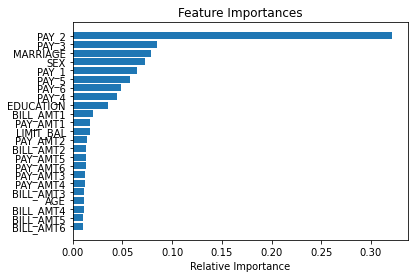

In [32]:
features=X.columns[:]
importances = xgb_cl.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()